Text Mining & Image Recognition  
Ramiro Wong  
23000952  
  
# Proyecto Final Parte 2 - CNN

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
base_path = "/content/drive/MyDrive/Proyecto_TextMining/images/"

In [3]:
str_img = "train_set/FreshCucumber/freshCucumber (594).jpg"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

### Data Augmentation y Input Data Flow para Train

In [7]:
data_train_path = base_path + "train_set/" # path a datos de entrenamiento

# mecanismo para data augmentation para generar variaciones de imágenes originales

train_data_generator = ImageDataGenerator(
    rescale=1/255.,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.5
)

train_data_flow = train_data_generator.flow_from_directory(
    directory=data_train_path,
    target_size = (64, 64), # lleva a tamaño estándar
    batch_size=32, # cuantas adicionales creamos
    class_mode = "categorical" # queremos clasificar multiples clases: papas, zanahorias, pepinos, fresas, naranjas y bananos
)

Found 2477 images belonging to 6 classes.


### Data Augmentation y Input Data Flow para Test

In [8]:
data_test_path = base_path + "test_set/" # path a datos de entrenamiento

# aqui no queremos modificar fotos, las queremos como vienen. Solo debemos hacer rescale

test_data_generator = ImageDataGenerator(
    rescale=1/255.
)

test_data_flow = test_data_generator.flow_from_directory(
    directory=data_test_path,
    target_size = (64, 64), # lleva a tamaño estándar
    batch_size=32, # cuantas adicionales creamos
    class_mode = "categorical" # queremos clasificar multiples clases: papas, zanahorias, pepinos, fresas, naranjas y bananos
)

Found 1200 images belonging to 6 classes.


## Redes Neuronales Convolucionales

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten

### Red Neuronal #1

* 1 capa convolucional con 64 filtros y kernel de 3x3
* 1 capa densa con 128 neuronas
* Capa de Pooling 2D
* Capa de flattening
* Función de activación ReLu
* Función en capa de salida softmax
* optimizador adam

In [14]:
cnn_v1 = Sequential()

# Fase de Preprocesamiento -----
cnn_v1.add(Conv2D(input_shape=(64, 64, 3), filters=64, kernel_size=(3,3), activation="relu")) # 3 porque son a colores

cnn_v1.add(MaxPool2D(pool_size=(2,2)))

cnn_v1.add(Flatten()) # lo hacemos vector para que la red neuronal lo reciba de esta forma

cnn_v1.add(Dense(units=128, activation="relu"))

cnn_v1.add(Dense(units=6, activation="softmax")) # capa salida - softmax porque es multiclase

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn_v1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
cnn_v1.fit(train_data_flow,
           steps_per_epoch=20,
           epochs=10, #10 subiteraciones
           validation_steps=100,
           validation_data=test_data_flow)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 893s 41s/step - accuracy: 0.2795 - loss: 2.8134 - val_accuracy: 0.4450 - val_loss: 1.4180
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


 4/20 ━━━━━━━━━━━━━━━━━━━━ 1:16 5s/step - accuracy: 0.4570 - loss: 1.3571

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 159s 8s/step - accuracy: 0.4659 - loss: 1.3274 - val_accuracy: 0.5258 - val_loss: 1.2444
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 135s 7s/step - accuracy: 0.5714 - loss: 1.0827 - val_accuracy: 0.5250 - val_loss: 1.0917
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.6919 - loss: 0.8503 - val_accuracy: 0.6475 - val_loss: 0.9462
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 174s 6s/step - accuracy: 0.7065 - loss: 0.8083 - val_accuracy: 0.7025 - val_loss: 0.7727
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.7068 - loss: 0.8243 - val_accuracy: 0.7042 - val_loss: 0.8082
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.7934 - loss: 0.5808 - val_accuracy: 0.7308 - val_loss: 0.6750
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.7682 - loss: 0.5728 - val_accuracy: 0.8492 - val_loss: 0.5572
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.8078 - loss: 0.5750 - val_accuracy: 0.7508 - val_loss: 0.6117


Consejo: revisar cómo guardar una red neuroanl como archivo h5 para no tener que volverla a entrenar

In [17]:
cnn_v1.save("/content/drive/MyDrive/Proyecto_TextMining/models/cnn_proyecto_v1.h5")

## Red Neuronal #2

* Se agrega una capa convolucional de 128 filtros
* Se agrega una capa densa de 64 neuronas

In [21]:
cnn_v2 = Sequential()

cnn_v2.add(Conv2D(input_shape=(64, 64, 3), filters=64, kernel_size=(3, 3), activation="relu"))
cnn_v2.add(MaxPool2D(pool_size=(2, 2)))

cnn_v2.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
cnn_v2.add(MaxPool2D(pool_size=(2, 2)))

cnn_v2.add(Flatten())
cnn_v2.add(Dense(units=128, activation="relu"))
cnn_v2.add(Dense(units=64, activation="relu"))

cnn_v2.add(Dense(units=6, activation="softmax"))

In [22]:
cnn_v2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [23]:
cnn_v2.fit(train_data_flow,
           steps_per_epoch=20,
           epochs=10, #10 subiteraciones
           validation_steps=100,
           validation_data=test_data_flow)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.2332 - loss: 1.7621 - val_accuracy: 0.5033 - val_loss: 1.3581
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5122 - loss: 1.2703 - val_accuracy: 0.5683 - val_loss: 1.0547
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6093 - loss: 0.9937 - val_accuracy: 0.6442 - val_loss: 1.0044
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6312 - loss: 0.9482 - val_accuracy: 0.7400 - val_loss: 0.7897
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7395 - loss: 0.7283 - val_accuracy: 0.6600 - val_loss: 0.9677
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7867 - loss: 0.6470 - val_accuracy: 0.8433 - val_loss: 0.4727
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8438 - loss: 0.4844 - val_accuracy: 0.8125 - val_loss: 0.5367
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7831 - loss: 0.5605 - val_accuracy: 0.8133 - val_loss:

In [24]:
cnn_v2.save("/content/drive/MyDrive/Proyecto_TextMining/models/cnn_proyecto_v2.h5")

## Red Neuronal #3

* Cambio a kernerl de 5x5
* Cambio a función de activación tanh
* Cambio a optimizador sgd

In [25]:
cnn_v3 = Sequential()


cnn_v3.add(Conv2D(input_shape=(64, 64, 3), filters=64, kernel_size=(5, 5), activation="tanh"))
cnn_v3.add(MaxPool2D(pool_size=(2, 2)))

cnn_v3.add(Conv2D(filters=128, kernel_size=(5, 5), activation="tanh"))
cnn_v3.add(MaxPool2D(pool_size=(2, 2)))

cnn_v3.add(Flatten())
cnn_v3.add(Dense(units=128, activation="tanh"))
cnn_v3.add(Dense(units=64, activation="tanh"))

cnn_v3.add(Dense(units=6, activation="softmax"))

In [26]:
cnn_v3.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [27]:
cnn_v3.fit(train_data_flow,
           steps_per_epoch=20,
           epochs=10,
           validation_steps=100,
           validation_data=test_data_flow)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.2076 - loss: 1.8949 - val_accuracy: 0.4392 - val_loss: 1.6188
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.3839 - loss: 1.6104 - val_accuracy: 0.3942 - val_loss: 1.4923
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.4771 - loss: 1.4173 - val_accuracy: 0.4425 - val_loss: 1.3791
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5077 - loss: 1.3004 - val_accuracy: 0.5475 - val_loss: 1.2693
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5270 - loss: 1.2810 - val_accuracy: 0.5608 - val_loss: 1.2609
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5556 - loss: 1.1579 - val_accuracy: 0.5192 - val_loss: 1.1843
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5593 - loss: 1.1865 - val_accuracy: 0.5967 - val_loss: 1.0807
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6125 - loss: 1.0565 - val_accuracy: 0.6708 - val_loss:

In [28]:
cnn_v3.save("/content/drive/MyDrive/Proyecto_TextMining/models/cnn_proyecto_v3.h5")

# Comparación de Redes Neuronales
  
De las tres arquitecturas que se probaron, la que mejor funcionó fue la #2. Esto se debe a que en su arquitectura tiene una capa adicional de pooling y también una capa densa que resultan en mejores predicciones que la arquitectura #1. La capa de pooling adicional estaría ayudando a reducir la dimensionalidad y así simplificar el modelo en su etapa inicial. La capa densa adicional tendría el efecto de permitir un mejor aprendizaje por medio de conexiones más complejas y agregar más relaciones no lineales.   

La red #3 tiene las mismas capas que la #2, pero diferente función de activación (tanh) y optimizador, resultando en peores predicciones. Esto es indicativo que las funciones ReLu y optimizador Adam seleccionados en la red 1 y 2 tuvieron mejor desempeño en este caso.

## Predicciones

Se realizó una prueba con la red neuronal #2 para una imagen de cada clase. Podemos ver que acierta 4 de las 6 veces, indicando que el desempeño de la red podría mejorar. Para las fresas y naranja, predice que son zanahorias.

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# Obtener los índices de las clases
class_indices = train_data_flow.class_indices

# Invertir el diccionario para tener una referencia más fácil
index_to_class = {v: k for k, v in class_indices.items()}

print(index_to_class)

{0: 'FreshBanana', 1: 'FreshCarrot', 2: 'FreshCucumber', 3: 'FreshOrange', 4: 'FreshPotato', 5: 'FreshStrawberry'}


In [45]:
def prueba_prediccion(file_vegetal):
  image_path = base_path + file_vegetal
  vegetal_predict = cv2.imread(image_path)
  vegetal_predict = cv2.cvtColor(vegetal_predict, cv2.COLOR_BGR2RGB)

  plt.imshow(vegetal_predict)
  plt.show()

  img = cv2.resize(vegetal_predict, (64, 64))
  img = img.astype("float32")/255.
  img = np.expand_dims(img, axis=0)

  prediccion = cnn_v2.predict(img)

  arr_vals = ["Banano", "Zanahoria", "Pepino", "Naranja", "Papa", "Fresa"]
  pred_out = np.argmax(prediccion, axis=1) # Obtener el índice de la clase con mayor probabilidad

  print(arr_vals[pred_out[0]]) # Imprimir el nombre de la clase correspondiente

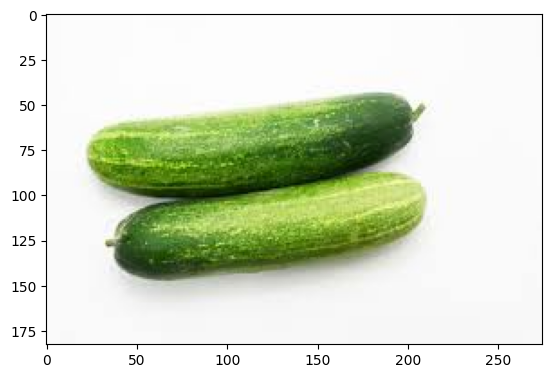

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Pepino


In [46]:
prueba_prediccion("pepino_descarga.jpeg")

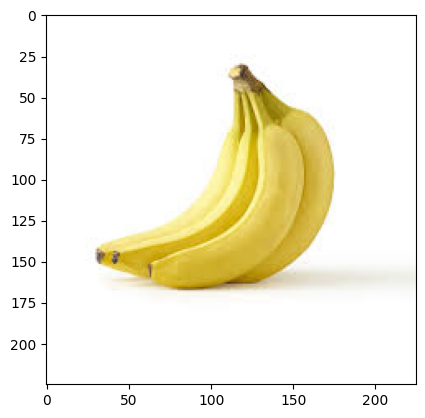

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Banano


In [49]:
prueba_prediccion("descarga_banano.jpeg")

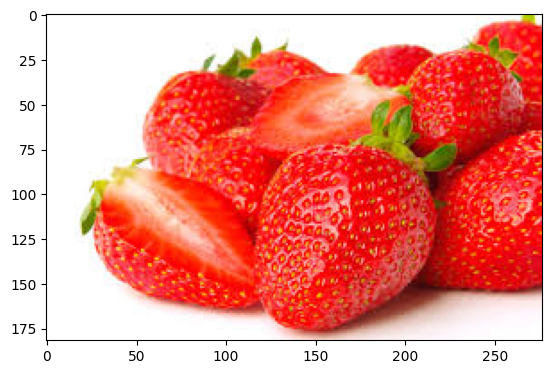

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Zanahoria


In [50]:
prueba_prediccion("descarga_fresa.jpeg")

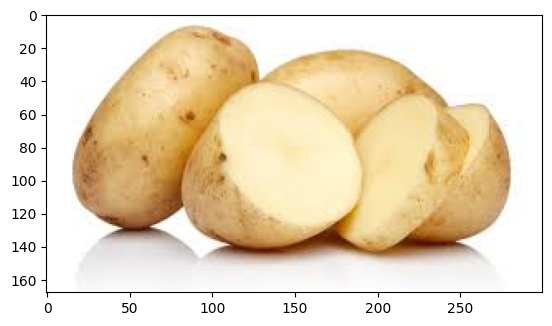

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Papa


In [51]:
prueba_prediccion("descarga_papa.jpeg")

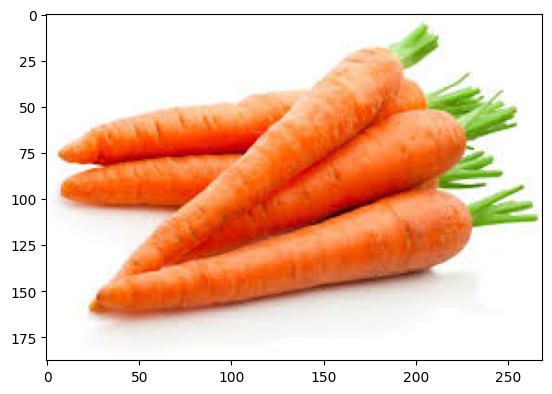

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Zanahoria


In [52]:
prueba_prediccion("descarga_zanahoria.jpeg")

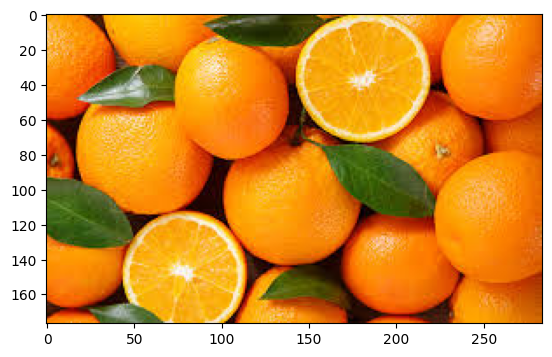

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Zanahoria


In [54]:
prueba_prediccion("descarga_naranja.jpeg")